# Import the libraries

In [35]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer #Term frequency - Inverse document frequency
from wordcloud import WordCloud

In [36]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to C:\Users\Yuvan Jeyan
[nltk_data]     G\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Yuvan Jeyan
[nltk_data]     G\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
dataset = pd.read_csv('Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset.csv')
dataset.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


# Preprocessing and cleaning the reviews

Check for null value and replace th null value

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [39]:
dataset.dropna(inplace=True)

In the sentiment column the values are aranged from 1-5 and we need to change it to (0-Negative , 1-Positive) for review category
with the following condition as if the sentiment value has less than 3, then it is negative(0), else positive(1)

In [40]:
dataset.loc[dataset['Sentiment']<=3,'Sentiment']=0
dataset.loc[dataset['Sentiment']>3,'Sentiment']=1

Once the dataset is ready, need to remove the stopwords from the review column

In [41]:
stop_words = stopwords.words('english')
def clean_review(review):
    cleanreview = " ".join(word for word in review.split() if word not in stop_words)
    return cleanreview
dataset['Review'] = dataset['Review'].apply(clean_review)

In [42]:
dataset.head()

,Review,Sentiment
0,Fast shipping product cheaply made I brought g...,0
1,This case takes long ship even worth DONT BUY!!!!,0
2,Good droids. Not good iPhones. You cannot use ...,0
3,The cable compatible macbook iphone. Also conn...,0
4,The case nice glow light. I'm disappointed pro...,0


# Analysis of Dataset

In [43]:
dataset['Sentiment'].value_counts()

0    15000
1     9999
Name: Sentiment, dtype: int64

# Convert the text into vector for creating the bag-of-words model

In [44]:
cv = TfidfVectorizer(max_features=2500)
x=cv.fit_transform(dataset['Review']).toarray()
y = dataset.iloc[:,-1].values

# Model training, evaluation, prediction

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [47]:
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [0 0]
 ...
 [1 0]
 [1 1]
 [0 0]]


0.81632
[[3311  407]
 [ 741 1791]]


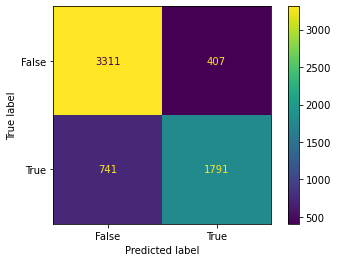

In [48]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
print(cm)

cm_map = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= ['False','True'])
cm_map.plot()
plt.show()